# Projeto Matéria Condensada: Modelos Tight-Binding

# Nickel bis(dithioleno)

Aluno: Enzo Januzzi Xavier

Orientador: Felipe David Crasto de Lima

Ilum Escola de Ciência, Centro Nacional de Pesquisa em Energia e Materiais (CNPEM)

## Enunciado e Contextualização:

*Nickel bis(dithioleno) é um MOF (Metal organic framework) bidimensional [J. Am. Chem. Soc. 2013,
135, 7, 2462-2465]. Os sítios do Nickel regem a estrutura eletrônica do sistema a baixas energias. Explore a mudança na estrutura de bandas do sistema quando alguns Ni são trocados por Pd.*

Inicialmente, é necessário definir os vetores de rede que descrevem o material, identificando os elementos de cada célula unitária. Segundo o enunciado, a célula estudada será delimitada pelos sítios de Níquel, e a partir disso é possível descrever o sistema utilizando modelos de **Tight Binding**.

A Figura 1 abaixo mostra a célula unitária escolhida, delimitada como os vetores em azul claro [1]. 

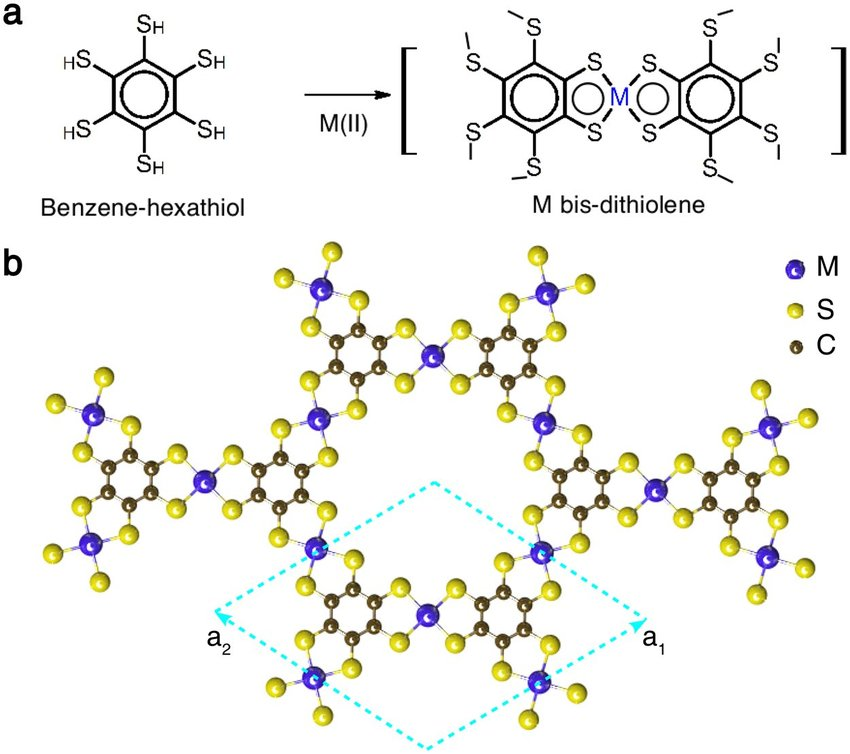

**Figura 1:** Estrutura cristalina do MOF juntamente com a célula unitária escolhida para esse projeto.

Podemos indentificar cinco sítios do metal M em azul escuro, correspondente ao átomo de Ni, porém no projeto será descrito os três primeiros inferiores. O objetivo é visualizar as ligações de hoppings intracelular e extracelular, comparando a estrutura de bandas com a substituição de Níquel por Paládio.



## Importações e Definições:

Importando as bibliotecas necessárias:


In [19]:
import matplotlib.pyplot as plt
import math
import pythtb as tb
import os

In [20]:
os.chdir('../Imagens/')

Definindo os parâmetros do problema com base no artigo e interpretação matemática, sabendo que é uma rede bidimensional hexagonal [2]:

In [21]:
# Vetor de rede   
a = 1.41      
theta = 120   # Ângulo entre os vetores, em graus

parametro_de_rede = [
    [a, 0.0],
    [a * math.cos(math.radians(theta)), a * math.sin(math.radians(theta))]
]

# Sítios atômicos na célula unitária
posicao=[[0.0,0.5],
         [0.5,0.0],
         [0.5,0.5]]

## Modelagem do Problema:

Descrevendo o modelo e exibindo suas principais informações:

In [22]:
model = tb.tb_model(2,2,parametro_de_rede, posicao) 
model.display()

---------------------------------------
report of tight-binding model
---------------------------------------
k-space dimension           = 2
r-space dimension           = 2
number of spin components   = 1
periodic directions         = [0, 1]
number of orbitals          = 3
number of electronic states = 3
lattice vectors:
 #  0  ===>  [    1.41 ,     0.0 ]
 #  1  ===>  [  -0.705 ,  1.2211 ]
positions of orbitals:
 #  0  ===>  [     0.0 ,     0.5 ]
 #  1  ===>  [     0.5 ,     0.0 ]
 #  2  ===>  [     0.5 ,     0.5 ]
site energies:
 #  0  ===>       0.0
 #  1  ===>       0.0
 #  2  ===>       0.0
hoppings:
hopping distances:



Estabelecendo as ligações de hoppings dentro da célula:

In [23]:
t = -1

# Hopping na mesma célula unitária
model.set_hop(t, 1, 2, [0, 0])   
model.set_hop(t, 2, 0, [0, 0])

# Hopping para células unitárias vizinhas
model.set_hop(t, 2, 0, [1, 0])
model.set_hop(t, 1, 0, [1, 0])

model.set_hop(t, 2, 1, [0, 1])
model.set_hop(t, 0, 1, [0, 1])

Visualizando a célula com os hoppings associados:

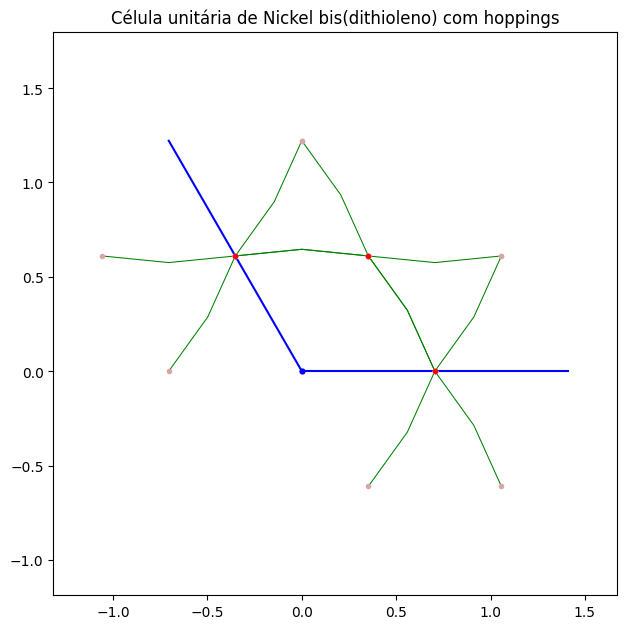

In [24]:
(fig, ax) = model.visualize(0,1, draw_hoppings=True)
ax.set_title("Célula unitária de Nickel bis(dithioleno) com hoppings")
fig.tight_layout()
plt.savefig("nibdt_lattice.png", dpi=300)
plt.show()

Ampliando a rede para mais células, criando uma supercélula:

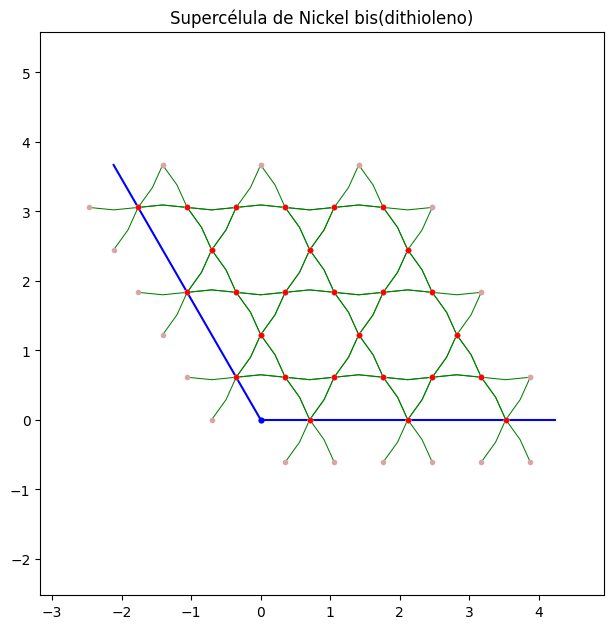

In [25]:
model2 = model.make_supercell([[3,0],[0,3]])
(fig, ax) = model2.visualize(0,1, draw_hoppings=True)
ax.set_title("Supercélula de Nickel bis(dithioleno)")
fig.tight_layout()
plt.savefig("nibdt_supercell.png", dpi=300)
plt.show()

Nota-se que a supercélula consegue descrever corretamente o sistema, com o padrão hexagonal e periódico.

## Estrutura de Bandas:

A matriz intracelular Hamiltoniana (H) pode ser escrita como [3]: 

$$H_{m,m} = \begin{pmatrix}
\varepsilon_{1} & t & 0 \\
t & \varepsilon_{2} & t \\
0 & t & \varepsilon_{3}
\end{pmatrix}$$

Em que $\varepsilon_{1},\varepsilon_{2},\varepsilon_{3}$ são as energias de sítio e $t$ o parâmetro de hopping. No caso das células vizinhas temos:

$$H_{m,m+1} = \begin{pmatrix}
0 & 0 & 0 \\
t & 0 & 0 \\
0 & t & 0
\end{pmatrix}, \quad H_{m,m-1} = \begin{pmatrix}
0 & t & 0 \\
0 & 0 & t \\
0 & 0 & 0
\end{pmatrix}$$

Essa matrizes são responsáveis pela dispersão de energia nas bandas eletrônicas, pois introduzem os fatores de onda na Hamiltoniana total no espaço recíproco. Assim, conseguimos entender a relação entre H e a rede recíproca k:

$$H(\mathbf{k}) = H_{m,m} + H_{m,m+1}e^{i\mathbf{k}\cdot \mathbf{a}_{1}} + H_{m,m-1}e^{-i\mathbf{k}\cdot \mathbf{a}_{1}} + ...$$

Assim, os autovalores do sistema são encontrados a partir do caminho definido no espaço recíproco, em que a rede mantem sua periodicidade com Γ, M e K de uma rede hexagonal.

In [26]:
# Caminho no espaço recíproco para uma rede hexagonal
path = [
    [0.0, 0.0],   # Γ
    [0.5, 0.0],   # M
    [1/3, 1/3],   # K
    [0.0, 0.0]    # Γ
]

# Gerar 201 pontos ao longo do caminho
(k_vec, k_dist, k_node) = model.k_path(path, 201)

----- k_path report begin ----------
real-space lattice vectors
 [[ 1.41    0.    ]
 [-0.705   1.2211]]
k-space metric tensor
 [[0.67066 0.33533]
 [0.33533 0.67066]]
internal coordinates of nodes
 [[0.      0.     ]
 [0.5     0.     ]
 [0.33333 0.33333]
 [0.      0.     ]]
reciprocal-space lattice vectors
 [[0.70922 0.40947]
 [0.      0.81894]]
cartesian coordinates of nodes
 [[0.      0.     ]
 [0.35461 0.20473]
 [0.23641 0.40947]
 [0.      0.     ]]
list of segments:
  length = 0.40947  from  [0. 0.]  to  [0.5 0. ]
  length = 0.23641  from  [0.5 0. ]  to  [0.33333 0.33333]
  length = 0.47281  from  [0.33333 0.33333]  to  [0. 0.]
node distance list: [0.      0.40947 0.64587 1.11869]
node index list:    [  0  73 115 200]
----- k_path report end ------------



Resolvendo o modelo e plotando os autovalores encontrados:

In [27]:
k_label=(r'$\Gamma $',r'$X$', r'$M$', r'$\Gamma $')

evals = model.solve_all(k_vec)
evals.shape

(3, 201)

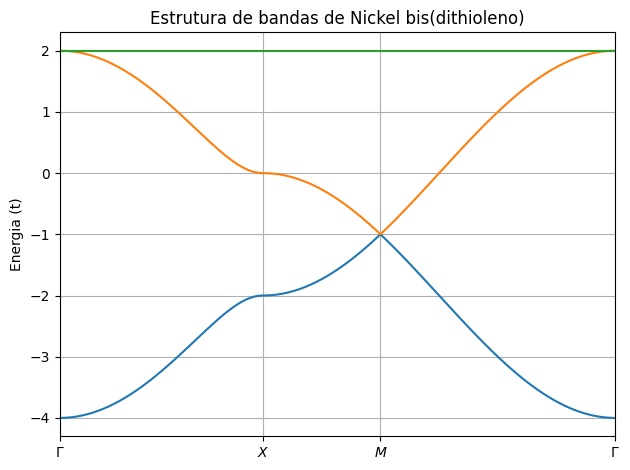

In [28]:
for n in range(3):
    plt.plot(k_dist, evals[n])

plt.ylabel('Energia (t)')
plt.xticks(k_node,k_label)
plt.xlim(k_node[0], k_node[-1])
plt.title("Estrutura de bandas de Nickel bis(dithioleno)")
plt.grid(True)
plt.tight_layout()
plt.savefig("nibdt_bandstructure.png", dpi=300)
plt.show()

A estrutura de bandas apresenta três bandas de energia com características distintas:

- Banda Verde (Flat Band): Esta banda é constante em energia ($E=C$). Como a velocidade de grupo ($v_g$) é proporcional à primeira derivada ($dE/dk$) e a massa efetiva ($m^*$) é inversamente proporcional à segunda ($d^2E/dk^2$), ambas as derivadas são nulas. Isso resulta em $v_g = 0$ e $m^* \rightarrow \infty$. Fisicamente, isso indica que os elétrons nesta banda estão localizados (imóveis) e não contribuem para a condução elétrica.

- Banda Laranja (Tipo Elétron): Esta banda é dispersiva ($v_g \neq 0$), permitindo o movimento de cargas. Ela possui regiões de mínimo com curvatura positiva ($d^2E/dk^2 > 0$), o que implica uma massa efetiva positiva ($m^* >0$). Este comportamento é característico de partículas semelhantes a elétrons.

- Banda Azul (Tipo Buraco): Esta banda também é dispersiva ($v_g \neq 0$). Ela possui regiões de máximo com curvatura negativa ($d^2E/dk^2 < 0$), implicando uma massa efetiva negativa ($m^* < 0$). Este comportamento é característico de buracos (lacunas). As bandas laranja e azul, que são condutoras, também mostram degenerescência (cruzamento) no ponto M.

## Sistema com Paládio:

Repetindo o processo trocando Ni por Pd e comparando os resultados. Criando uma função para facilitar as análises:

In [29]:
def bandas_M_bis_dithioleno(onsite, parametro_de_rede, posicao, path):
    model = tb.tb_model(2,2,parametro_de_rede, posicao)   
    t = -1

    # Hopping na mesma célula unitária
    model.set_hop(t, 1, 2, [0, 0])   
    model.set_hop(t, 2, 0, [0, 0])

    # Hopping para células unitárias vizinhas
    model.set_hop(t, 2, 0, [1, 0])
    model.set_hop(t, 1, 0, [1, 0])

    model.set_hop(t, 2, 1, [0, 1])
    model.set_hop(t, 0, 1, [0, 1])

    model.set_onsite(onsite)

    # Gerar 201 pontos ao longo do caminho
    (k_vec, k_dist, k_node) = model.k_path(path, 201)
    
    k_label = (r'$\Gamma$', r'$\Gamma$')

    # Resolver modelo
    if len(k_label) != len(path):
        raise ValueError("O número de rótulos não corresponde ao número de pontos no caminho.")
        
    evals = model.solve_all(k_vec)

    return k_dist, k_node, k_label, evals

Destacando o parâmetro de rede e a posição de cada átomo:

In [30]:
a = 1.41      
theta = 120   

parametro_de_rede = [
    [a, 0.0],
    [a * math.cos(math.radians(theta)), a * math.sin(math.radians(theta))]
]

posicao=[[0.0,0.5],
        [0.5,0.0],
        [0.5,0.5]]

### Dopagem: 1 Paládio

Definindo a troca de cada sítio por Pd com base na energia de sítio. Quanto mais negativa, mais fortemente ligado está o elétron (nível de energia mais estável) nesse local do que nos sítios vizinhos.

In [39]:
onsite0 = [-1, 0.0, 0.0]
onsite1 = [0.0, -1, 0.0]
onsite2 = [0.0, 0.0, -1]
sites = [onsite0, onsite1, onsite2]

# Caminho no espaço recíproco para cálculo das bandas
path = [
    [0.0, 0.0],   # Γ
    [1.0, 1.0]    # Γ
]

dist = []
node = []
label = []
evaluations = []

for onsite in sites:
    k_dist, k_node, k_label, evals = bandas_M_bis_dithioleno(onsite, parametro_de_rede, posicao, path)
    dist.append(k_dist)
    node.append(k_node)
    label.append(k_label)
    evaluations.append(evals)

----- k_path report begin ----------
real-space lattice vectors
 [[ 1.41    0.    ]
 [-0.705   1.2211]]
k-space metric tensor
 [[0.67066 0.33533]
 [0.33533 0.67066]]
internal coordinates of nodes
 [[0. 0.]
 [1. 1.]]
reciprocal-space lattice vectors
 [[0.70922 0.40947]
 [0.      0.81894]]
cartesian coordinates of nodes
 [[0.      0.     ]
 [0.70922 1.2284 ]]
list of segments:
  length = 1.41844  from  [0. 0.]  to  [1. 1.]
node distance list: [0.      1.41844]
node index list:    [  0 200]
----- k_path report end ------------

----- k_path report begin ----------
real-space lattice vectors
 [[ 1.41    0.    ]
 [-0.705   1.2211]]
k-space metric tensor
 [[0.67066 0.33533]
 [0.33533 0.67066]]
internal coordinates of nodes
 [[0. 0.]
 [1. 1.]]
reciprocal-space lattice vectors
 [[0.70922 0.40947]
 [0.      0.81894]]
cartesian coordinates of nodes
 [[0.      0.     ]
 [0.70922 1.2284 ]]
list of segments:
  length = 1.41844  from  [0. 0.]  to  [1. 1.]
node distance list: [0.      1.41844]
node i

PLotando a estrutura de bandas para cada onsite:

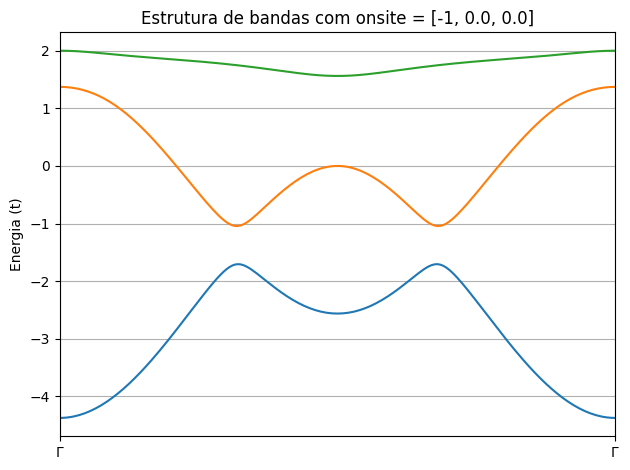

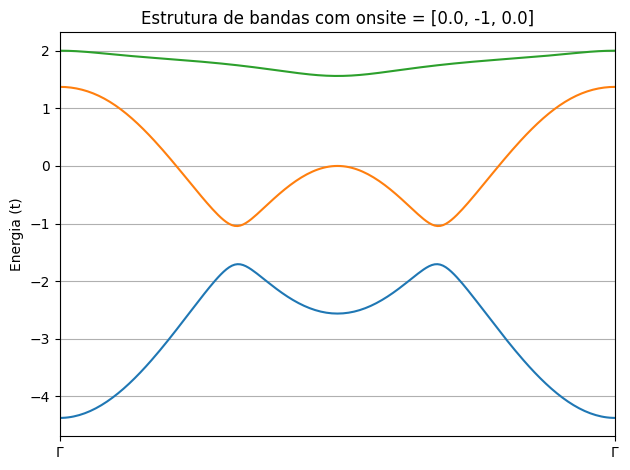

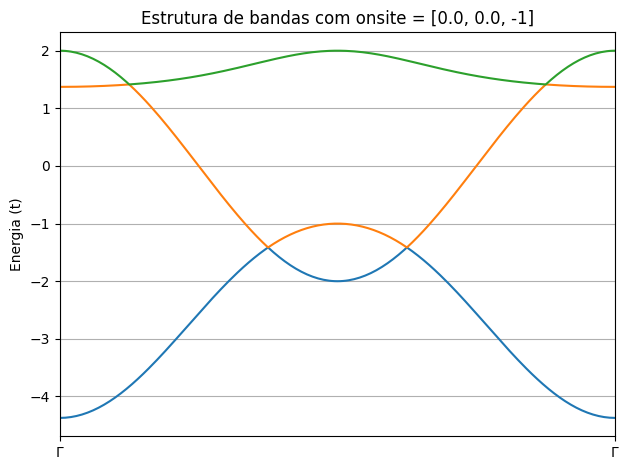

In [40]:
# Plotar as bandas para diferentes energias de onsite
for i, onsite in enumerate(sites):
    plt.figure()
    for n in range(3):
        plt.plot(dist[i], evaluations[i][n])
    plt.ylabel('Energia (t)')
    plt.xticks(node[i], label[i])
    plt.xlim(node[i][0], node[i][-1])
    plt.title(f"Estrutura de bandas com onsite = {onsite}")
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(f"nibdt_bandstructure_onsite_{i}.png", dpi=300)
    plt.show()

É evidente o afastamento entre as bandas energéticas, o que aumenta o *band gap* do material. Isso indica que a alteração estrutural prejudicou a condutividade do sistema.

### Dopagem: 2 Paládios

Repetindo o processo:

In [46]:
onsite00 = [-1, -1, 0.0]
onsite11 = [0.0, -1, -1]
onsite22 = [-1, 0.0, -1]
sites = [onsite00, onsite11, onsite22]

# Caminho no espaço recíproco para cálculo das bandas
path = [
    [0.0, 0.0],   # Γ
    [1.0, 1.0]    # Γ
]

dist2 = []
node2 = []
label2 = []
evaluations2 = []

for onsite in sites:
    k_dist, k_node, k_label, evals = bandas_M_bis_dithioleno(onsite, parametro_de_rede, posicao, path)
    dist2.append(k_dist)
    node2.append(k_node)
    label2.append(k_label)
    evaluations2.append(evals)

----- k_path report begin ----------
real-space lattice vectors
 [[ 1.41    0.    ]
 [-0.705   1.2211]]
k-space metric tensor
 [[0.67066 0.33533]
 [0.33533 0.67066]]
internal coordinates of nodes
 [[0. 0.]
 [1. 1.]]
reciprocal-space lattice vectors
 [[0.70922 0.40947]
 [0.      0.81894]]
cartesian coordinates of nodes
 [[0.      0.     ]
 [0.70922 1.2284 ]]
list of segments:
  length = 1.41844  from  [0. 0.]  to  [1. 1.]
node distance list: [0.      1.41844]
node index list:    [  0 200]
----- k_path report end ------------

----- k_path report begin ----------
real-space lattice vectors
 [[ 1.41    0.    ]
 [-0.705   1.2211]]
k-space metric tensor
 [[0.67066 0.33533]
 [0.33533 0.67066]]
internal coordinates of nodes
 [[0. 0.]
 [1. 1.]]
reciprocal-space lattice vectors
 [[0.70922 0.40947]
 [0.      0.81894]]
cartesian coordinates of nodes
 [[0.      0.     ]
 [0.70922 1.2284 ]]
list of segments:
  length = 1.41844  from  [0. 0.]  to  [1. 1.]
node distance list: [0.      1.41844]
node i

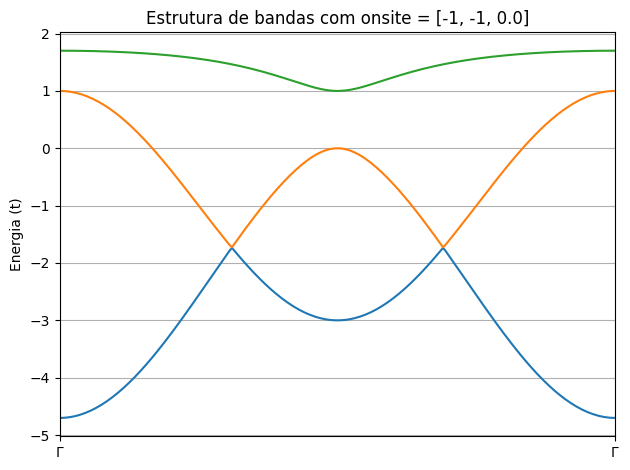

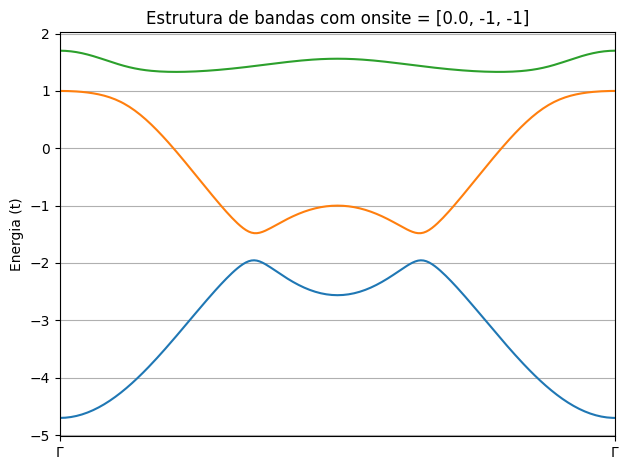

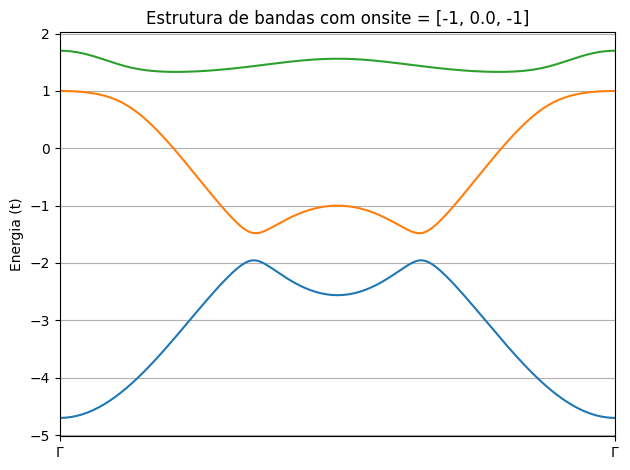

In [47]:
for i, onsite in enumerate(sites):
    plt.figure()
    for n in range(3):
        plt.plot(dist2[i], evaluations2[i][n])
    plt.ylabel('Energia (t)')
    plt.xticks(node2[i], label2[i])
    plt.xlim(node2[i][0], node2[i][-1])
    plt.title(f"Estrutura de bandas com onsite = {onsite}")
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(f"nibdt_bandstructure_onsite_{i}{i}.png", dpi=300)
    plt.show()

### Dopagem: 3 Paládios

In [43]:
onsite000 = [-1, -1, -1]

# Caminho no espaço recíproco para cálculo das bandas
path = [
    [0.0, 0.0],   # Γ
    [0.5, 0.0],   # M
    [1/3, 1/3],   # K
    [0.0, 0.0]    # Γ
]

# Gerar 201 pontos ao longo do caminho
(k_vec, k_dist, k_node) = model.k_path(path, 201)

k_label=(r'$\Gamma $',r'$X$', r'$M$', r'$\Gamma $')
evals = model.solve_all(k_vec)

----- k_path report begin ----------
real-space lattice vectors
 [[ 1.41    0.    ]
 [-0.705   1.2211]]
k-space metric tensor
 [[0.67066 0.33533]
 [0.33533 0.67066]]
internal coordinates of nodes
 [[0.      0.     ]
 [0.5     0.     ]
 [0.33333 0.33333]
 [0.      0.     ]]
reciprocal-space lattice vectors
 [[0.70922 0.40947]
 [0.      0.81894]]
cartesian coordinates of nodes
 [[0.      0.     ]
 [0.35461 0.20473]
 [0.23641 0.40947]
 [0.      0.     ]]
list of segments:
  length = 0.40947  from  [0. 0.]  to  [0.5 0. ]
  length = 0.23641  from  [0.5 0. ]  to  [0.33333 0.33333]
  length = 0.47281  from  [0.33333 0.33333]  to  [0. 0.]
node distance list: [0.      0.40947 0.64587 1.11869]
node index list:    [  0  73 115 200]
----- k_path report end ------------



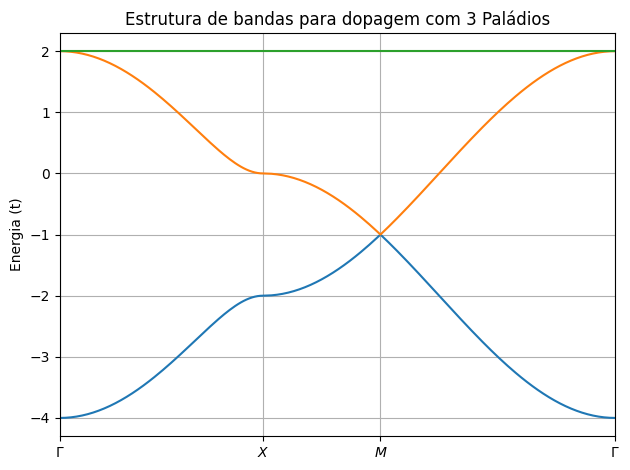

In [44]:
for n in range(3):
    plt.plot(k_dist, evals[n])

plt.ylabel('Energia (t)')
plt.xticks(k_node,k_label)
plt.xlim(k_node[0], k_node[-1])
plt.title(f"Estrutura de bandas para dopagem com 3 Paládios")
plt.grid(True)
plt.tight_layout()
plt.savefig(f"nibdt_bandstructure_onsite_000.png", dpi=300)
plt.show()

## Referências:


[1] Chern insulator with a nearly flat band in the metal-organic-framework-based Kagome lattice - Scientific Figure on ResearchGate. Available from: https://www.researchgate.net/figure/a-The-schematics-of-reaction-to-produce-metal-bis-dithiolene-complex-unit-that-makes_fig1_336015097 [accessed 12 Nov 2025]

[2] Kambe, Tetsuya, Ryota Sakamoto, Ken Hoshiko, Kenji Takada, Mariko Miyachi, Ji-Heun Ryu, Sono Sasaki, et al. 2013. “π-Conjugated Nickel Bis(Dithiolene) Complex Nanosheet.” Journal of the American Chemical Society 135 (7): 2462–65. https://doi.org/10.1021/ja312380b.

[3] Lima, D. C. Felipe. *Matéria Condensada I*, 2025. Material de Aula